In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Understanding/Predicting Returns
## Eliminate Waste - Understanding the attributes of a returned order will also Jiffy Shirts to know for example: 
 - which products that are shipped are often defected? Are often misinterpreted on the site? 
- Which customers are experiencing the most issues with their orders?

## Triage orders and prioritize shipping based on orders that a customer while actually consume - increased customer satisfaction from faster shipping

## Financial Planning - If average lead time is 4 weeks, Jiffy Shirts will be able to make forecasted revenue adjustments based on whats likely to be returned


In [3]:
orders = pd.read_csv("orders.csv")
items = pd.read_csv("line_items.csv")
customers = pd.read_csv("customers.csv")

In [4]:
orders.head()

,order_id,customer_uid,order_timestamp,discount,ship_state,shipping_revenue,shipping_cost,returned
0,38831,a6730d49e0989b2cc0158c6182fafb93,2015-11-30 05:03:15.159,0.00,FL,0.00,6.8,False
1,45499,ae2e8c1fa5326e1f793d4c02f720156c,2015-11-30 19:52:10.830,0.00,TN,5.95,6.8,True
2,69415,ba200839cd304b8342f8c5d0eb4d7c75,2015-12-02 22:54:40.380,0.00,TN,0.00,6.8,False
3,68761,b34cf44effba2eeb4d2a4db55ffe49d7,2015-12-02 20:24:30.925,0.00,MI,0.00,6.8,False
4,120057,10cedfe0d36280b646ff877ac1d916cb,2015-12-07 22:59:26.486,0.04,OH,0.00,6.8,False


In [5]:
items.head()

,line_item_id,order_id,quantity,selling_price,supplier_cost,product_category,color,size
0,1073625002,31323782,1,9.25,4.37,OTHER,BLACK,2XL
1,8055020046,22921936,1,9.25,4.37,OTHER,BLACK,2XL
2,5008546658,4435273,1,9.25,4.37,OTHER,BLACK,2XL
3,1013699827,6843815,1,9.25,4.37,OTHER,BLACK,2XL
4,1022146551,9923010,1,9.25,4.37,OTHER,RED,2XL


In [6]:
customers.head()

,customer_uid,is_business,has_account,bill_state,acquisition_channel
0,7d30104b82c22393003ac3c07b491c15,False,False,OK,coupon aggregator
1,77a48e4c4a69458d3421c54058350f93,False,False,CA,organic search
2,c9fe0dadc9e25ab478144bbd3a0ae750,False,False,WA,organic search
3,7a8bdb597d753c6c7430ea4e1d52fc48,False,False,TX,organic search
4,becb1413c375caba8707085efaac08e9,False,False,IL,organic search


In [70]:
df_all = orders.merge(items, on = 'order_id', how = 'left').merge(customers, on = 'customer_uid', how = 'left')

In [71]:
df_all['date'] = pd.to_datetime(df_all['order_timestamp'])
df_all= df_all.drop('order_timestamp', axis = 1)

In [40]:
df_all

,order_id,customer_uid,discount,ship_state,shipping_revenue,shipping_cost,returned,line_item_id,quantity,selling_price,supplier_cost,product_category,color,size,is_business,has_account,bill_state,acquisition_channel,date
0,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,False,4.000036e+09,4.0,3.02,1.91,Basic Tee,NAVY,L,False,True,FL,paid search,2015-11-30 05:03:15.159
1,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,False,4.000036e+09,1.0,3.41,1.89,OTHER,RED,L,False,True,FL,paid search,2015-11-30 05:03:15.159
2,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,False,4.000036e+09,4.0,3.02,1.91,Basic Tee,NAVY,S,False,True,FL,paid search,2015-11-30 05:03:15.159
3,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,False,4.000036e+09,1.0,6.84,3.69,OTHER,NAVY,S,False,True,FL,paid search,2015-11-30 05:03:15.159
4,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,False,4.000036e+09,2.0,3.02,1.91,Basic Tee,NAVY,XL,False,True,FL,paid search,2015-11-30 05:03:15.159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373874,96331780,e90fca766765e4292ad786b92446e014,0.04,CT,1.93,10.5,False,1.910350e+10,2.0,2.89,2.00,Fashion Tee,BLACK,M,True,True,CT,paid search,2020-12-31 21:19:24.687
373875,96331780,e90fca766765e4292ad786b92446e014,0.04,CT,1.93,10.5,False,1.910350e+10,5.0,2.89,2.00,Fashion Tee,BLACK,S,True,True,CT,paid search,2020-12-31 21:19:24.687
373876,96331780,e90fca766765e4292ad786b92446e014,0.04,CT,1.93,10.5,False,1.910350e+10,2.0,2.89,2.00,Fashion Tee,BLACK,XL,True,True,CT,paid search,2020-12-31 21:19:24.687
373877,96331780,e90fca766765e4292ad786b92446e014,0.04,CT,1.93,10.5,False,1.910350e+10,2.0,5.46,3.29,Fashion Tee,WHITE,2XL,True,True,CT,paid search,2020-12-31 21:19:24.687


In [72]:
df_all = df_all[~df_all['line_item_id'].isna()]
df_all = df_all[~df_all['selling_price'].isna()]
df_all = df_all[~df_all['bill_state'].isna()]

In [11]:
df_all.columns[df_all.isnull().any()]

Index([], dtype='object')

In [12]:
df_all[df_all['bill_state'].isna()]

,order_id,customer_uid,discount,ship_state,shipping_revenue,shipping_cost,returned,line_item_id,quantity,selling_price,supplier_cost,product_category,color,size,is_business,has_account,bill_state,acquisition_channel,date


<Axes: >

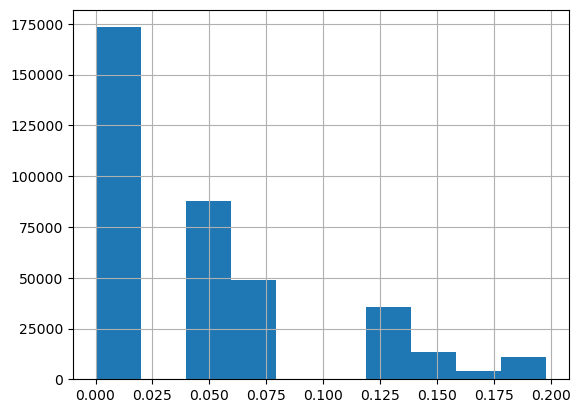

In [13]:
df_all['discount'].hist()

In [14]:
df_all.product_category.nunique()

5

In [15]:
df_all.color.nunique()

9

In [16]:
df_all.acquisition_channel.unique()

array(['paid search', 'direct', 'organic search', 'coupon aggregator',
       'referral', 'paid social'], dtype=object)

In [73]:
df_all['dow'] = df_all.date.dt.day_name()
dummy_df = pd.get_dummies(df_all, columns=['product_category', 'color','size','is_business','acquisition_channel','dow'], drop_first=False)
boolean_columns = dummy_df.select_dtypes(include='bool').columns
# Convert boolean columns to 1s and 0s
dummy_df[boolean_columns] = dummy_df[boolean_columns].astype(int)
dummy_df = dummy_df.drop(['is_business_False'], axis =1)
dummy_df

,order_id,customer_uid,discount,ship_state,shipping_revenue,shipping_cost,returned,line_item_id,quantity,selling_price,...,acquisition_channel_paid search,acquisition_channel_paid social,acquisition_channel_referral,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday
0,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,0,4.000036e+09,4.0,3.02,...,1,0,0,0,1,0,0,0,0,0
1,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,0,4.000036e+09,1.0,3.41,...,1,0,0,0,1,0,0,0,0,0
2,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,0,4.000036e+09,4.0,3.02,...,1,0,0,0,1,0,0,0,0,0
3,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,0,4.000036e+09,1.0,6.84,...,1,0,0,0,1,0,0,0,0,0
4,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,0,4.000036e+09,2.0,3.02,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373874,96331780,e90fca766765e4292ad786b92446e014,0.04,CT,1.93,10.5,0,1.910350e+10,2.0,2.89,...,1,0,0,0,0,0,0,1,0,0
373875,96331780,e90fca766765e4292ad786b92446e014,0.04,CT,1.93,10.5,0,1.910350e+10,5.0,2.89,...,1,0,0,0,0,0,0,1,0,0
373876,96331780,e90fca766765e4292ad786b92446e014,0.04,CT,1.93,10.5,0,1.910350e+10,2.0,2.89,...,1,0,0,0,0,0,0,1,0,0
373877,96331780,e90fca766765e4292ad786b92446e014,0.04,CT,1.93,10.5,0,1.910350e+10,2.0,5.46,...,1,0,0,0,0,0,0,1,0,0


In [74]:
cols_sum = ['quantity','selling_price']
cols_max = ['customer_uid','date','discount','shipping_cost','returned','is_business_True',
       'acquisition_channel_coupon aggregator', 'acquisition_channel_direct',
       'acquisition_channel_organic search', 'acquisition_channel_paid search',
       'acquisition_channel_paid social', 'acquisition_channel_referral','dow_Friday', 'dow_Monday', 'dow_Saturday', 'dow_Sunday',
       'dow_Thursday', 'dow_Tuesday', 'dow_Wednesday','product_category_Basic Tee',
       'product_category_Fashion Tee', 'product_category_OTHER',
       'product_category_Sweater', 'product_category_Tank Top', 'color_BLACK',
       'color_BLUE', 'color_COLOR', 'color_GRAY', 'color_GREEN',
       'color_HEATHER', 'color_NAVY', 'color_RED', 'color_WHITE', 'size_2XL',
       'size_3XL', 'size_4XL', 'size_L', 'size_M', 'size_OTHER', 'size_S',
       'size_XL', 'size_XS']


In [75]:
dummy_df_agg = dummy_df.groupby('order_id').agg({**{col: 'max' for col in cols_max},**{col: 'sum' for col in cols_sum}}).reset_index()
dummy_df_agg = dummy_df_agg.rename(columns=lambda x: x.strip().replace(" ", "_"))

In [38]:
dummy_df_agg

,order_id,customer_uid,date,discount,shipping_cost,returned,is_business_True,acquisition_channel_coupon_aggregator,acquisition_channel_direct,acquisition_channel_organic_search,...,color_WHITE,size_2XL,size_3XL,size_4XL,size_L,size_M,size_OTHER,size_S,size_XL,size_XS
0,817,23b0844d1e9419787212fe81a4a6796a,2015-12-19 19:29:58.391,0.00,6.80,0,1,0,0,0,...,0,0,0,1,0,1,0,0,2,0
1,1533,33cfcf2abb8ed4847c0f5e4ca51cc3c8,2015-12-02 22:28:16.071,0.00,6.80,0,0,0,0,1,...,3,0,0,0,0,0,2,1,0,0
2,2589,c7d0bd76e6fb1ca84141eabeb5408fad,2016-01-12 23:05:13.955,0.04,6.80,0,1,0,0,0,...,0,0,0,0,7,3,0,2,1,0
3,3461,10cedfe0d36280b646ff877ac1d916cb,2015-11-25 19:36:48.114,0.00,6.80,0,1,0,0,0,...,3,0,0,0,0,2,0,5,0,0
4,3701,23b0844d1e9419787212fe81a4a6796a,2016-03-31 15:12:24.976,0.00,6.80,0,1,0,0,0,...,1,0,0,0,1,2,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46417,96331780,e90fca766765e4292ad786b92446e014,2020-12-31 21:19:24.687,0.04,10.50,0,1,0,0,0,...,4,2,2,0,2,1,0,1,3,0
46418,96349700,dfa7bcd46538fc0ae83ed9c097b7697c,2020-12-31 16:31:01.153,0.00,11.65,0,1,0,0,0,...,1,0,0,0,1,1,0,0,4,0
46419,96370097,7a67d66867b4b944b0479cf77a7dbec8,2020-12-31 17:34:04.086,0.04,11.65,0,1,0,0,0,...,0,0,0,0,0,1,3,0,0,0
46420,96391611,b12294f0b36abbd7081771c94c7c4afe,2020-12-31 19:43:46.162,0.00,10.50,0,0,0,0,0,...,0,2,0,0,0,1,1,0,2,0


0.032425509110396565

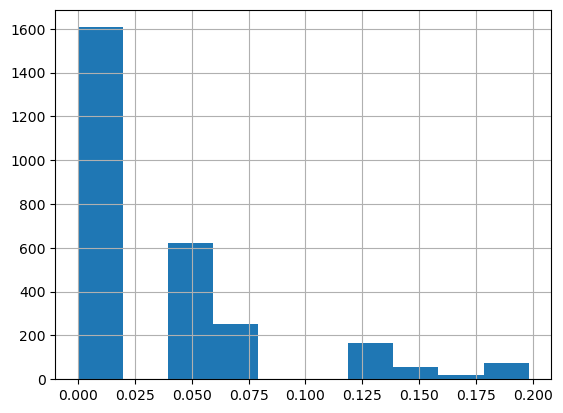

In [43]:
dummy_df_agg[dummy_df_agg['returned'] ==1]['discount'].hist()
dummy_df_agg[dummy_df_agg['returned'] ==1]['discount'].mean()

0.02329323980469019

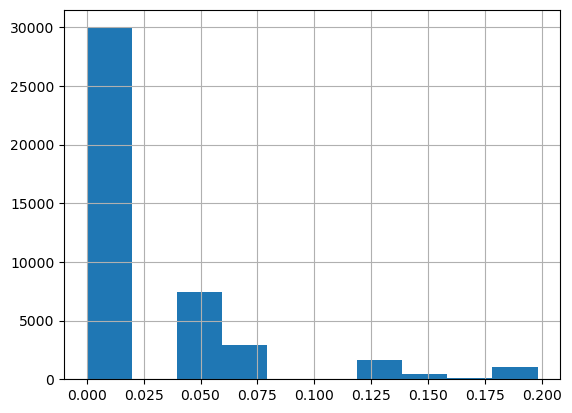

In [44]:
dummy_df_agg[dummy_df_agg['returned'] ==0]['discount'].hist()
dummy_df_agg[dummy_df_agg['returned'] ==0]['discount'].mean()

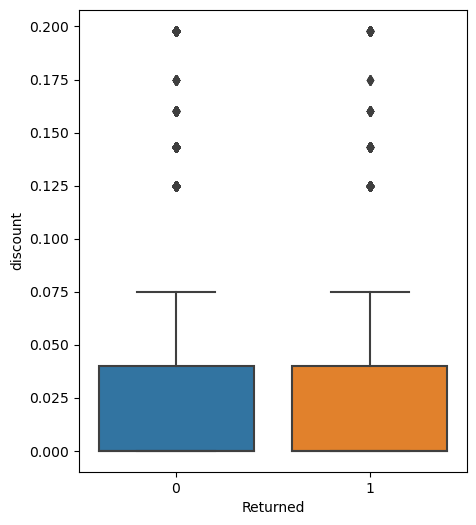

In [45]:
plt.figure(figsize=(5, 6))
sns.boxplot(x='returned', y='discount', data=dummy_df_agg)

plt.xlabel('Returned')
plt.ylabel('discount')

plt.show()

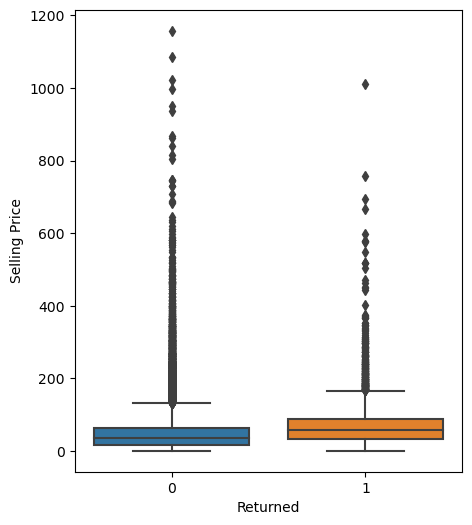

In [46]:
plt.figure(figsize=(5, 6))
sns.boxplot(x='returned', y='selling_price', data=dummy_df_agg)

plt.xlabel('Returned')
plt.ylabel('Selling Price')

plt.show()

In [76]:
pd.set_option('display.max_columns', None)
dummy_df_agg[dummy_df_agg['returned'] ==0].describe()

,order_id,date,discount,shipping_cost,returned,is_business_True,acquisition_channel_coupon_aggregator,acquisition_channel_direct,acquisition_channel_organic_search,acquisition_channel_paid_search,acquisition_channel_paid_social,acquisition_channel_referral,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday,product_category_Basic_Tee,product_category_Fashion_Tee,product_category_OTHER,product_category_Sweater,product_category_Tank_Top,color_BLACK,color_BLUE,color_COLOR,color_GRAY,color_GREEN,color_HEATHER,color_NAVY,color_RED,color_WHITE,size_2XL,size_3XL,size_4XL,size_L,size_M,size_OTHER,size_S,size_XL,size_XS,quantity,selling_price
count,4.362300e+04,43623,43623.000000,43623.000000,43623.0,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.00000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000
mean,2.660481e+07,2019-04-17 09:19:50.140014848,0.023293,8.150660,0.0,0.601838,0.035486,0.174380,0.034798,0.707402,0.019164,0.028769,0.129106,0.196479,0.080187,0.081975,0.160672,0.177911,0.17367,0.407148,0.515416,0.592875,0.160237,0.031841,0.545148,0.215230,0.555487,0.289641,0.160764,0.306306,0.113908,0.254109,0.355684,0.402930,0.184627,0.059487,0.697957,0.662563,0.282626,0.497811,0.631066,0.100222,18.500195,50.340619
min,8.170000e+02,2015-11-25 19:36:48.114000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.020000
25%,1.027247e+07,2018-06-14 09:39:03.299000064,0.000000,7.390000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,18.065000
50%,2.021287e+07,2019-07-08 20:57:32.143000064,0.000000,7.940000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,11.000000,37.050000
75%,3.040496e+07,2020-05-16 19:19:59.494000128,0.040000,8.540000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,64.120000
max,9.639224e+07,2021-01-01 01:00:11.137000,0.198000,19.950000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2477.000000,1157.830000
std,2.285509e+07,NaN,0.043968,1.664521,0.0,0.489525,0.185007,0.379441,0.183270,0.454961,0.137103,0.167159,0.335321,0.397339,0.271586,0.274330,0.367232,0.382442,0.37883,0.491308,0.499768,0.491304,0.366830,0.175579,0.497963,0.410987,0.4969

In [77]:
pd.set_option('display.max_columns', None)
dummy_df_agg[dummy_df_agg['returned'] ==1].describe()

,order_id,date,discount,shipping_cost,returned,is_business_True,acquisition_channel_coupon_aggregator,acquisition_channel_direct,acquisition_channel_organic_search,acquisition_channel_paid_search,acquisition_channel_paid_social,acquisition_channel_referral,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday,product_category_Basic_Tee,product_category_Fashion_Tee,product_category_OTHER,product_category_Sweater,product_category_Tank_Top,color_BLACK,color_BLUE,color_COLOR,color_GRAY,color_GREEN,color_HEATHER,color_NAVY,color_RED,color_WHITE,size_2XL,size_3XL,size_4XL,size_L,size_M,size_OTHER,size_S,size_XL,size_XS,quantity,selling_price
count,2.799000e+03,2799,2799.000000,2799.000000,2799.0,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.00000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000
mean,2.656630e+07,2019-05-21 02:55:16.039735040,0.032426,8.304173,1.0,0.678457,0.026081,0.159343,0.017149,0.748482,0.012504,0.036442,0.131833,0.216863,0.071454,0.085388,0.163987,0.162201,0.168274,0.357270,0.692390,0.726331,0.152197,0.052161,0.593069,0.317613,0.676313,0.383351,0.209718,0.447660,0.125402,0.339050,0.436942,0.431583,0.177206,0.052161,0.77492,0.772419,0.349768,0.630940,0.706681,0.171847,23.872454,74.342840
min,3.793500e+04,2015-11-30 02:44:15.210000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.020000
25%,1.173086e+07,2018-08-31 05:45:32.480999936,0.000000,7.390000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,34.410000
50%,2.023537e+07,2019-07-08 15:08:34.454000128,0.000000,7.940000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,1.000000,0.000000,14.000000,58.530000
75%,2.976821e+07,2020-04-28 02:20:29.091500032,0.040000,8.540000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,25.000000,87.310000
max,9.608819e+07,2020-12-31 19:06:39.822000,0.198000,19.950000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,614.000000,1012.230000
std,2.207299e+07,NaN,0.048921,1.727303,0.0,0.467152,0.159404,0.366061,0.129850,0.433963,0.111142,0.187420,0.338369,0.412182,0.257628,0.279508,0.370330,0.368701,0.374177,0.479281,0.461587,0.445921,0.359276,0.222392,0.491350,0.465631,0.467966,0.486290,0.407180,0.497342,0.331233,0.47

In [78]:
#drop to avoid multicollinearity problems
logit_drop_cols = ['color_BLACK', 'product_category_Basic_Tee', 'size_2XL','dow_Friday','acquisition_channel_coupon_aggregator']
logit_cols = [i for i in dummy_df_agg if i not in ['returned', 'date','order_id','customer_uid']+logit_drop_cols]

In [79]:
import statsmodels.api as sm

log_reg = sm.Logit(dummy_df_agg[['returned']],sm.add_constant(dummy_df_agg[logit_cols])).fit() 

Optimization terminated successfully.
         Current function value: 0.215744
         Iterations 8


In [80]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               returned   No. Observations:                46422
Model:                          Logit   Df Residuals:                    46385
Method:                           MLE   Df Model:                           36
Date:                Thu, 07 Dec 2023   Pseudo R-squ.:                 0.05283
Time:                        00:46:59   Log-Likelihood:                -10015.
converged:                       True   LL-Null:                       -10574.
Covariance Type:            nonrobust   LLR p-value:                3.619e-211
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -4.1058      0.164    -25.107      0.000      -4.426      -3.785
discount                               0.7459      0.525      1.421      0.155      -0.283       1.775
shipping_cost                          0.0143      0.012      1.225      0.220      -0.009       0.037
is_business_True                       0.6475      0.073      8.904      0.000       0.505       0.790
acquisition_channel_direct            -0.0245      0.131     -0.187      0.852      -0.282       0.232
acquisition_channel_organic_search    -0.6146      0.193     -3.179      0.001      -0.994      -0.236
acquisition_channel_paid_search       -0.5999      0.141     -4.240      0.000      -0.877      -0.323
acquisition_channel_paid_social       -0.1833      0.212     -0.865      0.387      -0.599       0.232
acquisition_channel_referral           0.2705      0.160      1.687      0.092      -0.044       0.585
dow_Monday                            -0.0173      0.069     -0.249      0.804      -0.153       0.119
dow_Saturday                          -0.0805      0.092     -0.877      0.380      -0.260       0.099
dow_Sunday                             0.0679      0.087      0.779      0.436      -0.103       0.239
dow_Thursday                          -0.0007      0.073     -0.009      0.993      -0.144       0.143
dow_Tuesday                           -0.1443      0.073     -1.967      0.049      -0.288      -0.001
dow_Wednesday                         -0.0818      0.073     -1.123      0.261      -0.225       0.061
product_category_Fashion_Tee           0.5065      0.048     10.557      0.000       0.412       0.601
product_category_OTHER                 0.5216      0.049     10.619      0.000       0.425       0.618
product_category_Sweater              -0.1794      0.058     -3.087      0.002      -0.293      -0.065
product_category_Tank_Top              0.1672      0.093      1.807      0.071      -0.014       0.349
color_BLUE                             0.1784      0.046      3.892      0.000       0.089       0.268
color_COLOR                            0.1995      0.045      4.442      0.000       0.111       0.287
color_GRAY                             0.0940      0.043      2.166      0.030       0.009       0.179
color_GREEN                           -0.0081      0.052     -0.156      0.876      -0.109       0.093
color_HEATHER                          0.2063      0.044      4.672      0.000       0.120       0.293
color_NAVY                            -0.1265      0.062     -2.050      0.040      -0.247      -0.006
color_RED                              0.0896      0.044      2.022      0.043       0.003       0.176
color_WHITE                            0.1241      0.042      2.980      0.003       0.042       0.206
size_3XL                              -0.2605      0.055     -4.746      0.000      -0.368      -0.153
size_4XL                              -0.1698   

In [ ]:
# Selling price, is_business_True, product_category_Fashion_Tee, color_HEATHER, size_XS associated with more returns
#acquisition_channel_organic_search, product_category_Sweater, color_NAVY, size_3XL associated with fewer returns

In [81]:
from scipy.stats import fisher_exact

odds_ratio_cols = [i for i in dummy_df_agg if i not in ['returned', 'date','order_id','customer_uid', 'discount','shipping_cost','quantity','selling_price']]
results_df = pd.DataFrame(columns=['Variable', 'Odds_Ratio', 'p_value'])
frames = []
for var in odds_ratio_cols:
    contingency_table = pd.crosstab(dummy_df_agg['returned'], dummy_df_agg[var])
    odds_ratio, p_value = fisher_exact(contingency_table)
    
    result_df = pd.DataFrame({'Variable': [var], 'Odds Ratio': [odds_ratio], 'P-value': [p_value]})
    frames.append(result_df)


results_df = pd.concat(frames, ignore_index=True)

In [84]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
results_df

,Variable,Odds Ratio,P-value
0,is_business_True,1.396,0.000
1,acquisition_channel_coupon_aggregator,0.728,0.008
2,acquisition_channel_direct,0.897,0.042
3,acquisition_channel_organic_search,0.484,0.000
4,acquisition_channel_paid_search,1.231,0.000
5,acquisition_channel_paid_social,0.648,0.010
6,acquisition_channel_referral,1.277,0.024
7,dow_Friday,1.024,0.684
8,dow_Monday,1.132,0.009
9,dow_Saturday,0.883,0.105


In [88]:
#This confirms a lot of the above when we look at whether the odds ratio was above or below 1

In [89]:
# Lets assess if this is predictable with a lightly tuned XGBoost model
#create features for rolling averages
dummy_df_agg.sort_values("date",inplace = True)
dummy_df_agg.head()

,order_id,customer_uid,date,discount,shipping_cost,returned,is_business_True,acquisition_channel_coupon_aggregator,acquisition_channel_direct,acquisition_channel_organic_search,acquisition_channel_paid_search,acquisition_channel_paid_social,acquisition_channel_referral,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday,product_category_Basic_Tee,product_category_Fashion_Tee,product_category_OTHER,product_category_Sweater,product_category_Tank_Top,color_BLACK,color_BLUE,color_COLOR,color_GRAY,color_GREEN,color_HEATHER,color_NAVY,color_RED,color_WHITE,size_2XL,size_3XL,size_4XL,size_L,size_M,size_OTHER,size_S,size_XL,size_XS,quantity,selling_price
3,3461,10cedfe0d36280b646ff877ac1d916cb,2015-11-25 19:36:48.114,0.000,6.800,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,9.000,54.090
11,14364,e2322693c3b6c76423772f9171264bd1,2015-11-27 12:48:23.323,0.000,6.800,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3.000,8.090
12,15939,c7d0bd76e6fb1ca84141eabeb5408fad,2015-11-27 18:58:10.389,0.040,6.800,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,26.000,46.260
18,23291,e39c17251e5e11bb17350875b2a36a2a,2015-11-28 13:43:02.421,0.000,6.800,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.000,2.720
22,28335,2000a3b69e4b57006a15f95409be54b7,2015-11-29 01:31:22.020,0.040,6.800,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,13.000,150.810


In [90]:
dummy_df_agg['rollin_5_rr'] = dummy_df_agg.groupby("customer_uid")['returned'].rolling(window=5, min_periods=2).mean().reset_index(level=0, drop=True)
dummy_df_agg['rollin_5_rr'] = dummy_df_agg.groupby('customer_uid')['rollin_5_rr'].shift(1)

dummy_df_agg['rollin_50_rr'] = dummy_df_agg.groupby("customer_uid")['returned'].rolling(window=50, min_periods=6).mean().reset_index(level=0, drop=True)
dummy_df_agg['rollin_50_rr'] = dummy_df_agg.groupby('customer_uid')['rollin_50_rr'].shift(1)


dummy_df_agg['rollin_5_rr'] = dummy_df_agg['rollin_5_rr'].fillna(dummy_df_agg['rollin_5_rr'].mean())
dummy_df_agg['rollin_50_rr'] = dummy_df_agg['rollin_50_rr'].fillna(dummy_df_agg['rollin_50_rr'].mean())

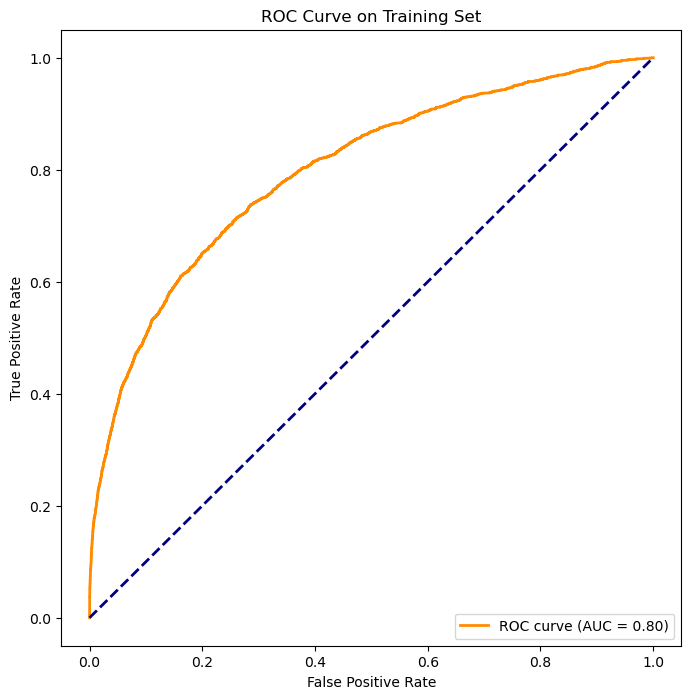

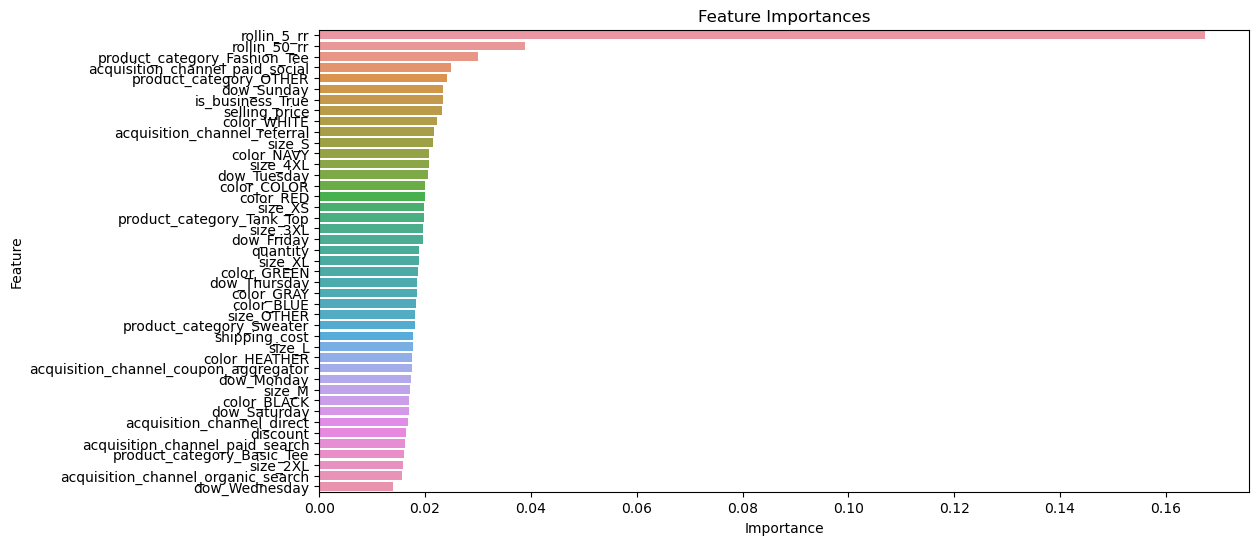

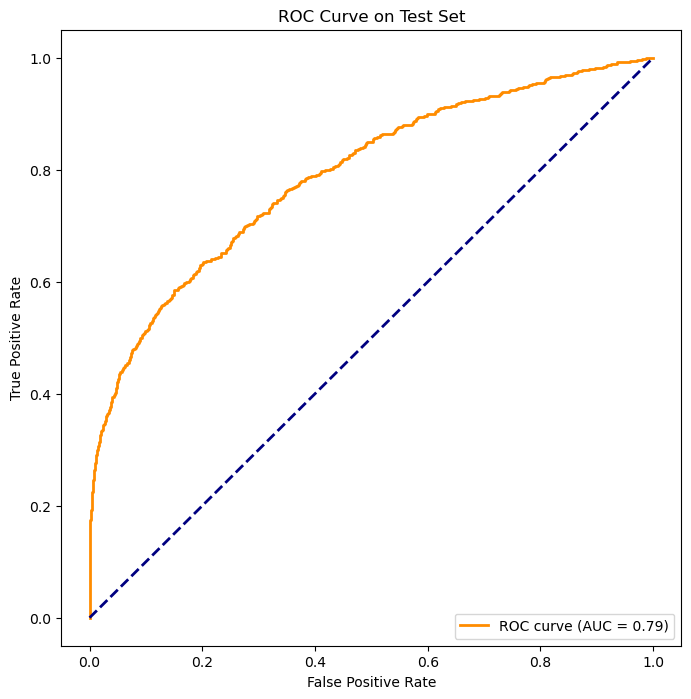

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
fin_df = dummy_df_agg.drop(['order_id','customer_uid','date'], axis = 1)
train_size = 35000

train_set = fin_df.head(train_size)

test_set = fin_df.tail(len(fin_df) - train_size)

X_train = train_set.drop('returned', axis=1)
y_train = train_set['returned']

X_test = test_set.drop('returned', axis=1)
y_test = test_set['returned']

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=0)

# Perform cross-fold validation on the training set
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
y_pred_proba = cross_val_predict(xgb_model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]

# Plot ROC curve on the training set
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Training Set')
plt.legend(loc="lower right")
plt.show()

# Train the final model on the entire training set
final_model = xgb_model.fit(X_train, y_train)

# Display feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': final_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# Evaluate the final model on the test set
y_pred_proba_test = final_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve on the test set
plt.figure(figsize=(8, 8))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Test Set')
plt.legend(loc="lower right")
plt.show()


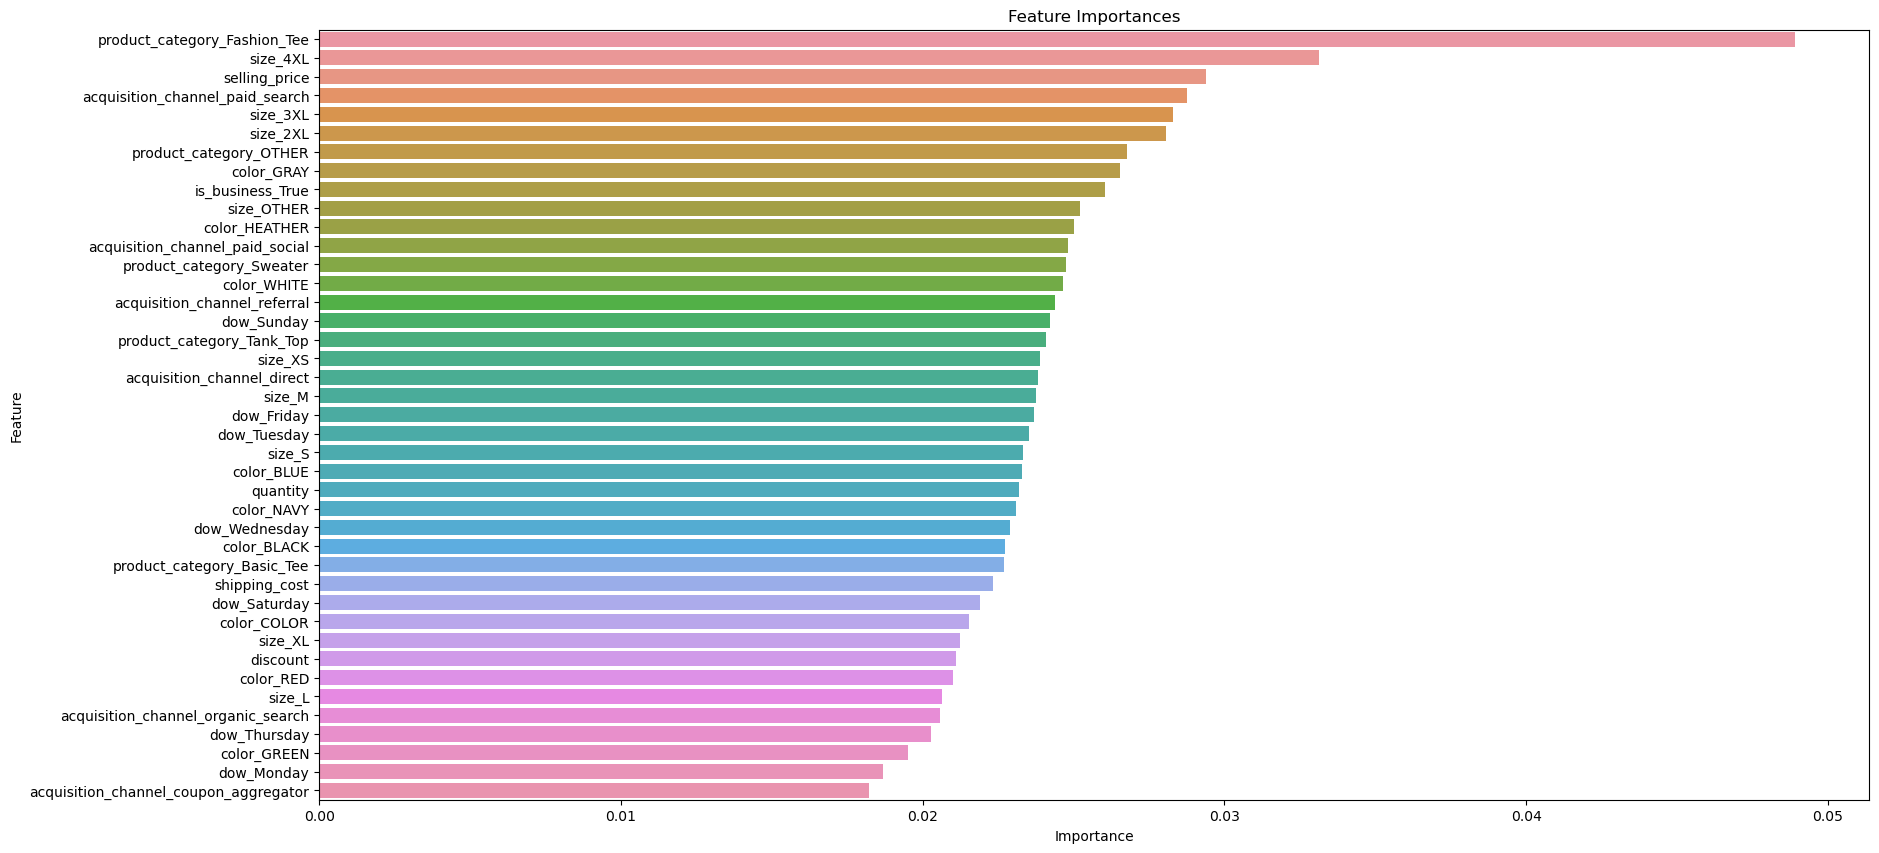

In [92]:
# Lets train one more time but without our most important features to see where other features stack up

fin_df = dummy_df_agg.drop(['order_id','customer_uid','date', 'rollin_5_rr','rollin_50_rr'], axis = 1)
train_size = 35000

train_set = fin_df.head(train_size)

test_set = fin_df.tail(len(fin_df) - train_size)

X_train = train_set.drop('returned', axis=1)
y_train = train_set['returned']

X_test = test_set.drop('returned', axis=1)
y_test = test_set['returned']

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=0)

# Perform cross-fold validation on the training set
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
y_pred_proba = cross_val_predict(xgb_model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]


final_model = xgb_model.fit(X_train, y_train)

# Display feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': final_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

## From the OLS and ANOVA test, we found that:
- product_category_OTHER, being a business, and selling price are associated with more returns. 
- product_category_Basic_Tee, product_category_Basic_Tee, and buying on weekends, are associated with fewer returns. 


## From the XGBoost modeling:
- we discovered that returns are fairly predictable
- Previous customer behavior is by far the most important factor in predicting